# Data analysis

In this notebook, I am going to analyze the dataset. First, we proceed by installing the necessary dependencies for data analysis and for reading the `.h5` file.

In [1]:
!pip install h5py
!pip install pillow
!pip install pandas

Next, we read the data file and extract the data and labels.

In [2]:
import h5py
import numpy as np
import pandas as pd

path = "../data/Train_EnergyGround_alt5200m_qgsii_fluka_N44971.h5"

with h5py.File(path, "r") as f:
    data = np.array(f["data"])
    info = pd.read_hdf(path, key="info")

In the code cell bellow, we are going to inspect the data size. As we can see, the training dataset has 44.971 samples and each sample is a 80x80 image with 1 channel.

In [3]:
data.shape

(44971, 80, 80)

Let's see a sample of the dataset and show it as an image.

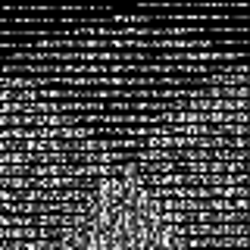

In [4]:
from PIL import Image

sample = data[0]
img = Image.fromarray(sample, 'L')
new_img = img.resize((250,250))
new_img.save("sample.jpg", "JPEG")
new_img

We have the data but not the labels. Where is it? Let's see in `info`...

In [5]:
info

,ID_shower,E0,theta0,Nmuons,Y_class
0,0.0,62743.449219,0.0,578.0,0.0
1,1.0,40416.339844,0.0,408.0,0.0
2,2.0,61331.218750,0.0,539.0,0.0
3,3.0,57133.789062,0.0,434.0,0.0
4,4.0,61603.351562,0.0,477.0,0.0
...,...,...,...,...,...
22485,22485.0,2572.270020,0.0,13.0,1.0
22486,22486.0,3828.409912,0.0,21.0,1.0
22487,22487.0,2528.129883,0.0,30.0,1.0
22488,22488.0,3443.100098,0.0,27.0,1.0


Ok, now we know where are the labels and the number of classes in this dataset is 2. Each class represent:
- Class 0: No Muon presence.
- Class 1: Muon presence.

In [6]:
labels = info.loc[:, "Y_class"].values
unique , counts = np.unique(labels, return_counts=True)
dict(zip(unique.astype(int), counts))

{0: 22481, 1: 22490}

In the test set I've got 14.989 samples.

In [7]:
test_path = "../data/Test_EnergyGround_alt5200m_qgsii_fluka_N14989.h5"

with h5py.File(test_path, "r") as f:
    data = np.array(f["data"])
    info = pd.read_hdf(path, key="info")

print(data.shape)

(14989, 80, 80)


Let's see the class balance on the test dataset.

In [8]:
labels = info.loc[:, "Y_class"].values
unique , counts = np.unique(labels, return_counts=True)

dict(zip(unique.astype(int), counts))

{0: 22481, 1: 22490}